<a href="https://colab.research.google.com/github/SVRT1997/Phoenix_Datathon/blob/main/Datathon_Phoenix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import calendar
import plotly as pt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from pylab import *
import matplotlib.patheffects as PathEffects

import descartes
# import geopandas as gpd
# from Levenshtein import distance
# from itertools import product
# from fuzzywuzzy import fuzz
# from fuzzywuzzy import process
from scipy.spatial.distance import pdist, squareform

from shapely.geometry import Point, Polygon
from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')


plt.rcParams['font.family'] = "Microsoft JhengHei UI Light"
plt.rcParams['font.serif'] = ["Microsoft JhengHei UI Light"]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Accident/US_Accidents_Dec21_updated.csv")

In [ ]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [42]:
val = df.loc[(df['Severity']==4),['City','Street','Start_Time']]
val

,City,Street,Start_Time
42,Dunkirk,W State Road 26,2016-02-09 18:20:58
43,Redkey,N Meridian St,2016-02-09 18:20:58
47,Willshire,State Route 49,2016-02-10 06:18:49
191,Madison,W State Road 250,2016-02-15 20:46:40
437,Milford,N State Road 15,2016-02-24 12:27:56
...,...,...,...
2845034,Sturtevant,Washington Ave,2019-08-23 07:44:30
2845036,Blair,N 19th St,2019-08-23 12:14:35
2845037,Blair,N 19th St,2019-08-23 12:14:35
2845302,Yuba City,Thompson Rd,2019-08-23 17:25:12


In [ ]:
states = df.State.unique()

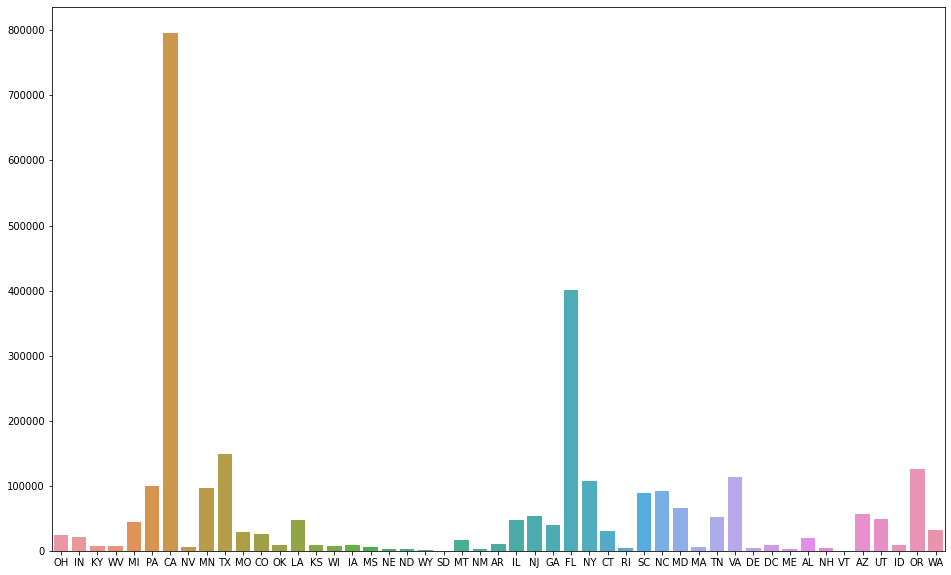

In [ ]:
count_by_state=[]
for i in df.State.unique():
    count_by_state.append(df[df['State']==i].count()['ID'])

fig,ax = plt.subplots(figsize=(16,10))
sns.barplot(states,count_by_state)

In [ ]:
city_df = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})
top_10_cities = pd.DataFrame(city_df.head(10))

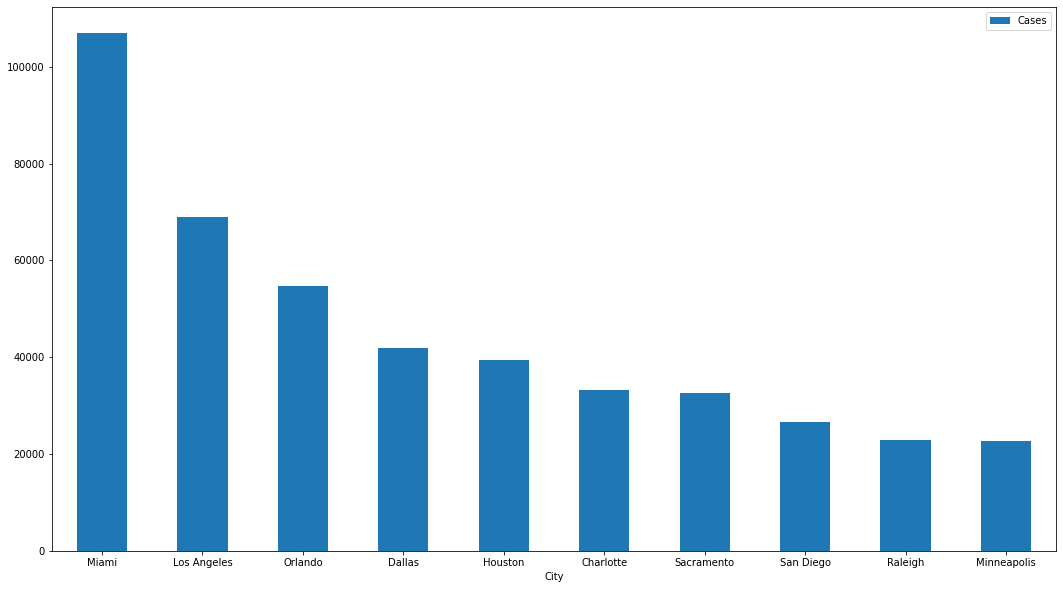

In [ ]:
ax = top_10_cities.plot.bar(figsize = (18,10),x='City', y='Cases', rot=0)

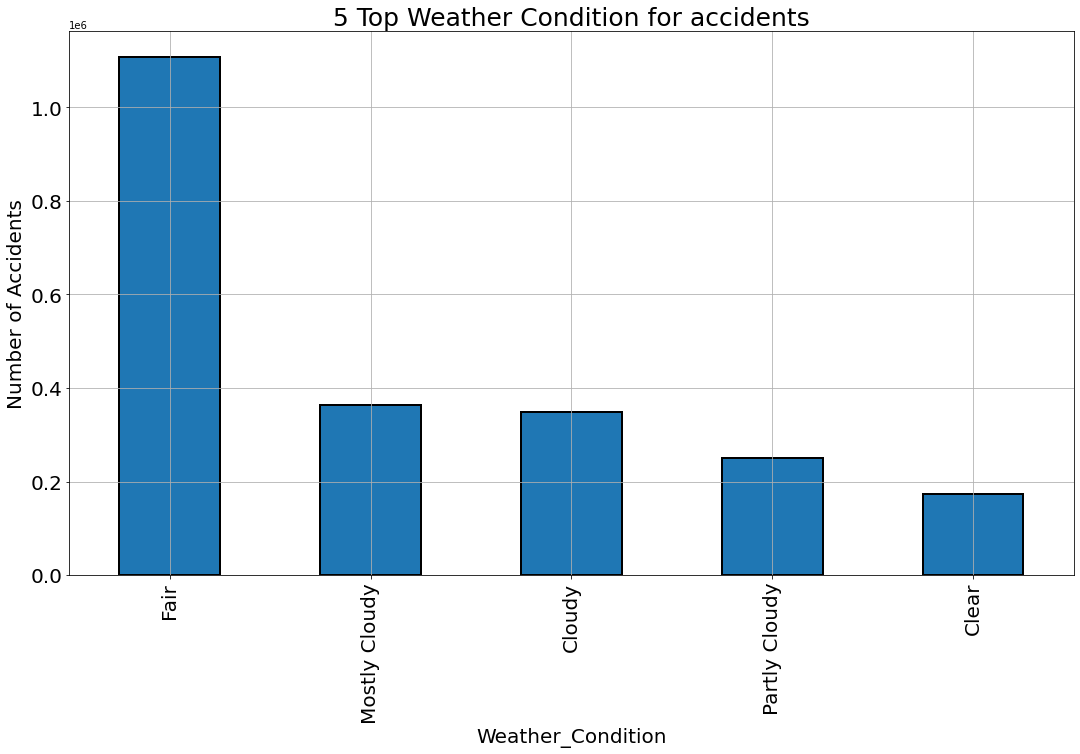

In [ ]:
fig, ax=plt.subplots(figsize=(18,10))
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Weather_Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('5 Top Weather Condition for accidents',fontsize=25)
plt.grid()
plt.ioff()

In [ ]:
# convert the Start_Time & End_Time Variable into Datetime Feature
df.Start_Time = pd.to_datetime(df.Start_Time)
df.End_Time = pd.to_datetime(df.End_Time)
month_df = pd.DataFrame(df.Start_Time.dt.month.value_counts()).reset_index().rename(columns={'index':'Month', 'Start_Time':'Cases'}).sort_values('Month')

month_names = list(calendar.month_name)[1:]
month_df.Month = month_names

In [ ]:
month_df

,Month,Cases
5,January,198365
6,February,194995
11,March,158224
9,April,171880
7,May,181944
4,June,226561
10,July,159111
8,August,178670
3,September,241822
2,October,299131


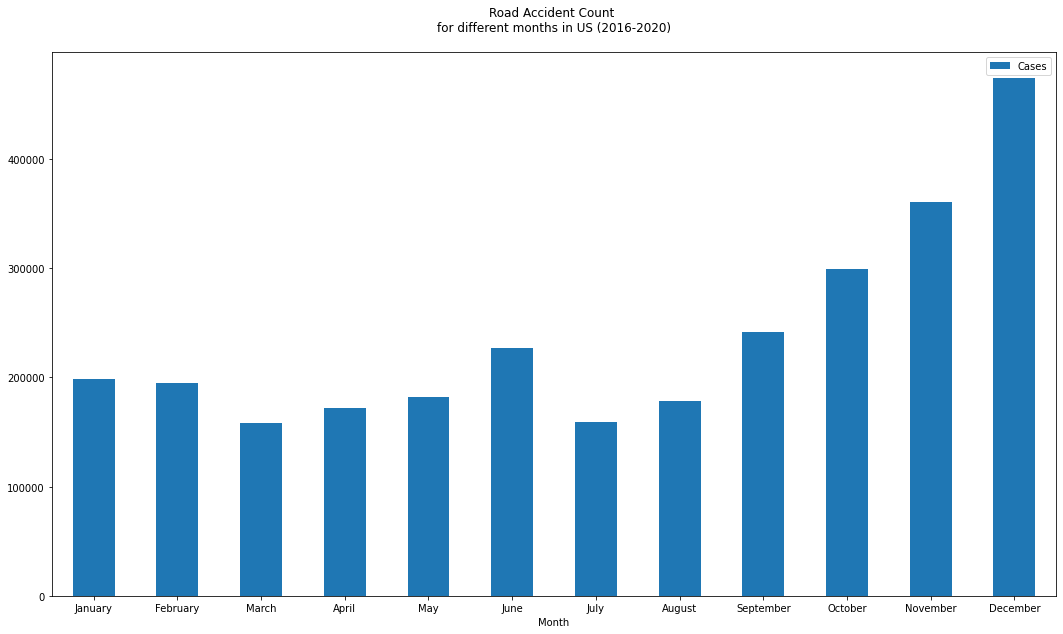

In [ ]:
bx = month_df.plot.bar(figsize = (18,10),x='Month', y='Cases', rot=0,title = "Road Accident Count \nfor different months in US (2016-2020)\n")

In [ ]:
day_df = pd.DataFrame(df.Start_Time.dt.day_name().value_counts()).reset_index().rename(columns={'index':'Day', 'Start_Time':'Cases'})

In [ ]:
day_df

,Day,Cases
0,Friday,492074
1,Thursday,463477
2,Wednesday,455037
3,Tuesday,443968
4,Monday,419821
5,Saturday,311691
6,Sunday,259274


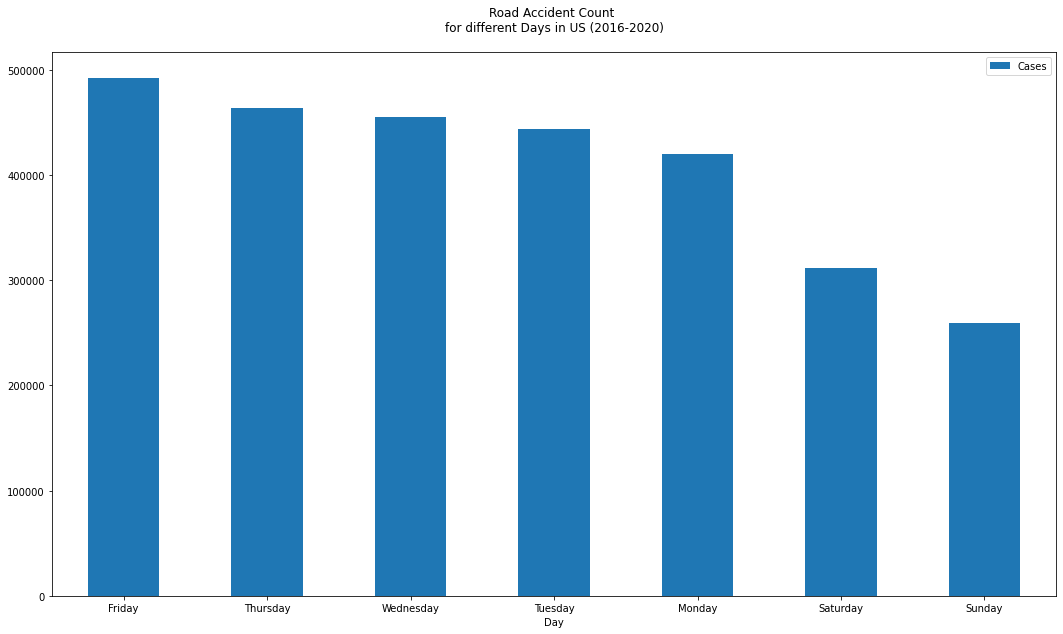

In [ ]:
cx = day_df.plot.bar(figsize = (18,10), x='Day', y='Cases', rot=0,title = "Road Accident Count \nfor different Days in US (2016-2020)\n")

In [ ]:
df.dropna(subset=df.columns[df.isnull().mean()!=0], how='any', axis=0, inplace=True)
df.shape

(943318, 47)

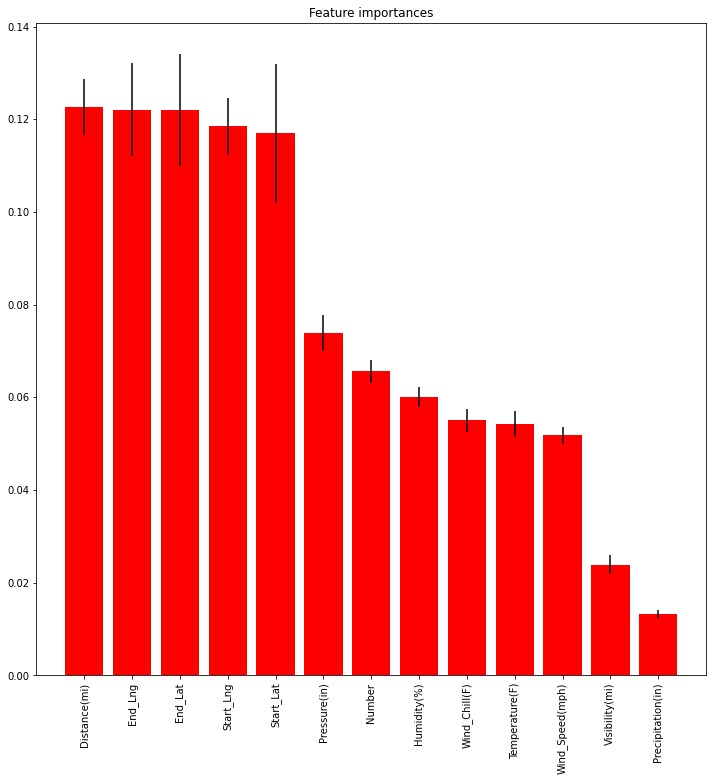

In [ ]:
train_y = df['Severity'].values
x_cols = [col for col in df.columns if col not in ['Severity'] if df[col].dtype=='float64']
train_col= df[x_cols]

fearture_name = train_col.columns.values 

from sklearn import ensemble 

model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(train_col,train_y)

#plot imp 
importance = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importance)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importance[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), fearture_name[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

[10:41:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


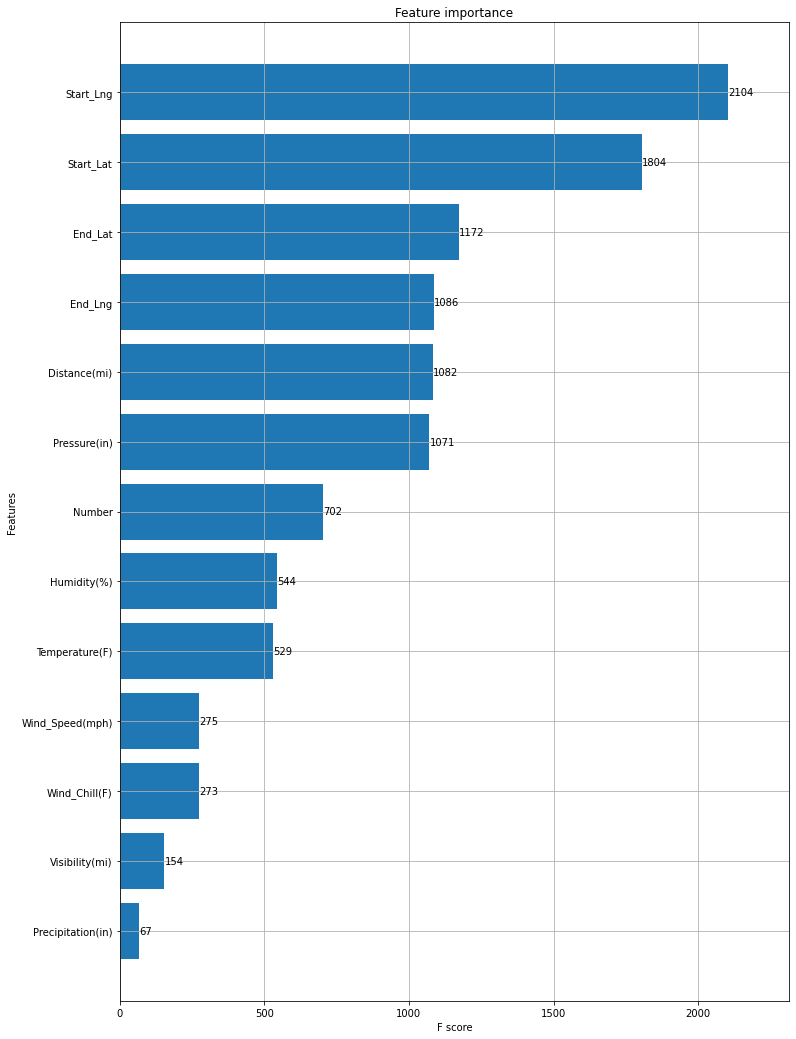

In [ ]:
import xgboost as xgb 

xgb_prames = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}

dtrain = xgb.DMatrix(train_col,train_y,feature_names=train_col.columns.values)

model = xgb.train(dict(xgb_prames, silent=0), dtrain, num_boost_round=50)


fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [ ]:
new_df  = df[df['City'] == "Los Angeles"]

In [ ]:
LA_df = pd.DataFrame(new_df.Street.value_counts()).reset_index().rename(columns={'index':'Street', 'Street':'Cases'})

In [ ]:
LA_df

,Street,Cases
0,S Figueroa St,823
1,S Alameda St,758
2,W Manchester Ave,668
3,Whittier Blvd,511
4,W Slauson Ave,484
...,...,...
1175,Benda St,1
1176,Jesse St,1
1177,Belmont Ave,1
1178,Riverside Ter,1


In [ ]:
new_1 = new_df[new_df['Street'] == "E El Segundo Blvd"]

In [ ]:
new_1['Severity']

Series([], Name: Severity, dtype: int64)

In [ ]:
severe_df = pd.DataFrame(df.Severity.value_counts()).reset_index().rename(columns={'index':'Severity', 'Severity':'Cases'})

In [ ]:
severe_df

,Severity,Cases
0,2,889904
1,4,29073
2,3,13716
3,1,10625


In [ ]:
data = df.drop(['ID','Start_Time', 'End_Time', 'End_Lat', 'End_Lng', 'Distance(mi)',
'Description','Number','Street','Side','City',
'County','State','Zipcode','Country','Timezone',
'Airport_Code','Weather_Timestamp', 'Wind_Chill(F)', 'Wind_Direction',
'Weather_Condition','Amenity','Bump','Crossing','Give_Way',
'Junction','No_Exit','Railway','Roundabout','Station','Stop',
'Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Civil_Twilight',
'Nautical_Twilight','Astronomical_Twilight', 'Precipitation(in)'], axis=1)

In [ ]:
data.isnull().sum()

Severity           0
Start_Lat          0
Start_Lng          0
Temperature(F)     0
Humidity(%)        0
Pressure(in)       0
Visibility(mi)     0
Wind_Speed(mph)    0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data = data.reset_index()

In [ ]:
data = data.drop(['index'],axis =1)

In [ ]:
data

,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
0,4,40.451120,-85.150480,19.9,81.0,29.85,2.0,12.7
1,4,40.354290,-85.149930,19.9,81.0,29.85,2.0,12.7
2,4,40.728130,-84.789650,17.1,77.0,29.91,2.5,19.6
3,2,41.831930,-80.101430,21.0,85.0,29.69,1.0,10.4
4,2,41.483390,-81.662970,24.1,75.0,29.82,2.0,28.8
...,...,...,...,...,...,...,...,...
943313,3,37.609816,-122.493720,78.0,54.0,29.77,10.0,7.0
943314,4,38.995930,-121.672020,98.0,23.0,29.62,10.0,8.0
943315,4,39.003170,-121.662679,98.0,23.0,29.62,10.0,8.0
943316,3,34.121320,-117.254540,67.0,73.0,28.61,10.0,3.0


In [ ]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [ ]:
algo_lst = ['Random forest','Logistic regression','K-Nearest Neighbors','Decision Tree','']

In [ ]:
# Set the target for the prediction
target='Severity'


# Create arrays for the features and the response variable

# set X and y
y = data[target]
X = data.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [ ]:
# Random Forest algorithm

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
#accuracy_lst.append(acc)


# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))

[Randon forest algorithm] accuracy_score: 0.956.


In [ ]:
accuracy_lst = []
accuracy_lst.append(acc)

In [ ]:
# Logistic regression
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

[Logistic regression algorithm] accuracy_score: 0.943.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train,y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

[K-Nearest Neighbors (KNN)] accuracy_score: 0.944.


In [ ]:
# Decision tree algorithm

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)


# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)


# Print accuracy_entropy
print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))
# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)


# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

# Append to the accuracy list
acc=accuracy_gini
accuracy_lst.append(acc)

# Print accuracy_gini
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))

[Decision Tree -- entropy] accuracy_score: 0.946.
[Decision Tree -- gini] accuracy_score: 0.946.


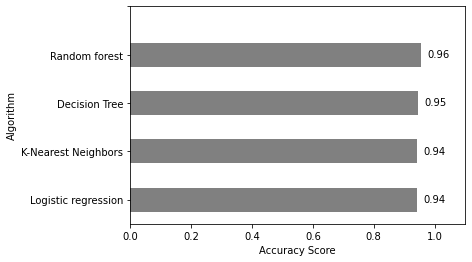

In [ ]:
# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algo_lst))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)


# Make a plot
ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False,color='0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
#plt.title('[{}-{}] Which algorithm is better?'.format(state, county))

plt.show()

In [ ]:
import pickle

In [ ]:
pickle.dump(clf, open('RNmodel.pkl','wb'))

In [ ]:
data.head(3)

,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
0,4,40.45112,-85.15048,19.9,81.0,29.85,2.0,12.7
1,4,40.35429,-85.14993,19.9,81.0,29.85,2.0,12.7
2,4,40.72813,-84.78965,17.1,77.0,29.91,2.5,19.6


In [ ]:
xt = data['Severity'][0]
xt

4

In [ ]:
yt = data.drop('Severity', axis=1)
yt = yt[0:1]
yt

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
0,40.45112,-85.15048,19.9,81.0,29.85,2.0,12.7


In [ ]:
type(yt)

pandas.core.frame.DataFrame

In [ ]:
loaded_model = pickle.load(open('RNmodel.pkl','rb'))

In [ ]:
res = loaded_model.predict(yt)

In [ ]:
res =res.flatten()

In [ ]:
res[0]

4

In [ ]:
clean = df[['Start_Lat','Start_Lng','City', 'Street']]
clean

,Start_Lat,Start_Lng,City,Street
42,40.451120,-85.150480,Dunkirk,W State Road 26
43,40.354290,-85.149930,Redkey,N Meridian St
47,40.728130,-84.789650,Willshire,State Route 49
50,41.831930,-80.101430,Cambridge Springs,Highway 99
66,41.483390,-81.662970,Cleveland,Iron Ct
...,...,...,...,...
2845298,37.609816,-122.493720,Pacifica,San Marlo Way
2845302,38.995930,-121.672020,Yuba City,Thompson Rd
2845303,39.003170,-121.662679,Yuba City,Tudor Rd
2845304,34.121320,-117.254540,San Bernardino,E Base Line St


In [ ]:
clean = clean.reset_index(drop=True)

In [ ]:
clean['Street'] = clean['Street'].str.strip()
clean['City'] = clean['City'].str.strip()
clean

,Start_Lat,Start_Lng,City,Street
0,40.451120,-85.150480,Dunkirk,W State Road 26
1,40.354290,-85.149930,Redkey,N Meridian St
2,40.728130,-84.789650,Willshire,State Route 49
3,41.831930,-80.101430,Cambridge Springs,Highway 99
4,41.483390,-81.662970,Cleveland,Iron Ct
...,...,...,...,...
943313,37.609816,-122.493720,Pacifica,San Marlo Way
943314,38.995930,-121.672020,Yuba City,Thompson Rd
943315,39.003170,-121.662679,Yuba City,Tudor Rd
943316,34.121320,-117.254540,San Bernardino,E Base Line St


In [ ]:
clean.to_csv('clean.csv', index=False)

In [ ]:
val = clean.loc[(clean['City']=="Los Angeles") & (clean['Street'] == "S Figueroa St"),['Start_Lat','Start_Lng']]
val['lat_lng'] = val['Start_Lat'] + val['Start_Lng']
val

In [ ]:
len(val.lat_lng.unique())

153